In [1]:
## importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import data'
data = pd.read_csv("survey_results_public.csv")

In [3]:
data.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [4]:
data.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [5]:
# as we are building salary prediction app,
# we will create new dataframe with only features affect salary most

df = data[["Country",  ## currency and people available for work differ by country to country
           "EdLevel",## education level affects salary
           "YearsCodePro", #coding experince i.e. more experience more salary
           "Employment", #part time, fulltime, student
           "ConvertedCompYearly" # salary yearly in usd
          ]]

df = df.rename({"ConvertedCompYearly":"Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN


In [6]:
df = df[df.Salary.notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  object 
 3   Employment    46831 non-null  object 
 4   Salary        46844 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [8]:
df = df.dropna() #we will drop null values as dataset is large enough
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [9]:
df.shape

(46359, 5)

In [10]:
df1 = df[df["Employment"]== "Employed full-time"]
df1.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0
17,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,Employed full-time,46135.0


In [11]:
df1.drop(['Employment'],axis=1, inplace=True)
df1.head()

C:\anacondafolder\envs\stacksalary\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Country,EdLevel,YearsCodePro,Salary
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,17748.0
17,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,46135.0


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40211 entries, 9 to 83438
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40211 non-null  object 
 1   EdLevel       40211 non-null  object 
 2   YearsCodePro  40211 non-null  object 
 3   Salary        40211 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [13]:
df1['Country'].value_counts()

United States of America                                9175
India                                                   3385
Germany                                                 2753
United Kingdom of Great Britain and Northern Ireland    2604
Canada                                                  1553
                                                        ... 
Saint Kitts and Nevis                                      1
Monaco                                                     1
Libyan Arab Jamahiriya                                     1
Somalia                                                    1
Burundi                                                    1
Name: Country, Length: 166, dtype: int64

In [14]:
## we have few countries with very less data points, which will lead misbehavior of model in training
# we create one other category "other" where countries with less data points than cutoff value present

def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = "others"
    return categorical_map

In [15]:
country_map = shorten_categories(df1.Country.value_counts(), 400)
df1['Country'] = df1['Country'].map(country_map)

df1.Country.value_counts()

C:\Users\ADIKUR~1\AppData\Local\Temp/ipykernel_7844/482068133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Country'] = df1['Country'].map(country_map)


others                                                  10725
United States of America                                 9175
India                                                    3385
Germany                                                  2753
United Kingdom of Great Britain and Northern Ireland     2604
Canada                                                   1553
France                                                   1396
Brazil                                                   1340
Spain                                                     890
Netherlands                                               835
Australia                                                 825
Poland                                                    775
Italy                                                     756
Russian Federation                                        741
Sweden                                                    735
Turkey                                                    458
Switzerl

In [16]:
import re

In [ ]:
for i in df1['Country']:
    pattern= re.compile("United States of America")
    df1["Country"][i] =re.sub(pattern,"United States",i)

C:\Users\ADIKUR~1\AppData\Local\Temp/ipykernel_7844/3653022551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Country"][i] =re.sub(pattern,"United States",i)
C:\anacondafolder\envs\stacksalary\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


In [ ]:
df1.Country.value_counts()

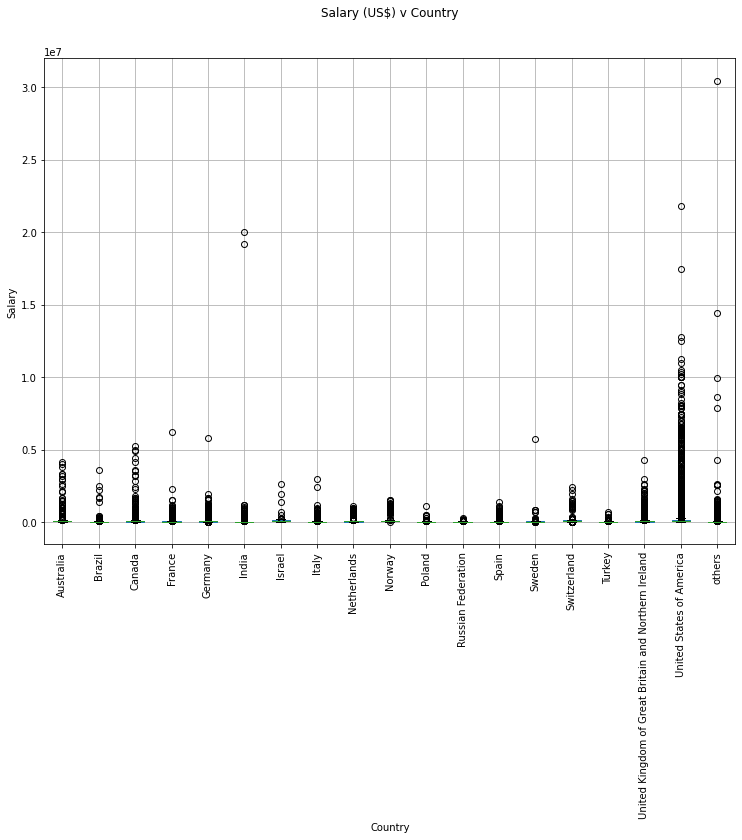

In [16]:
fig, ax = plt.subplots(1,1, figsize=(12,9))
df1.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [17]:
df1 = df1[df1["Salary"] <= 250000]
df1 = df1[df1["Salary"] >= 10000]
df1 = df1[df1['Country'] != 'Other']

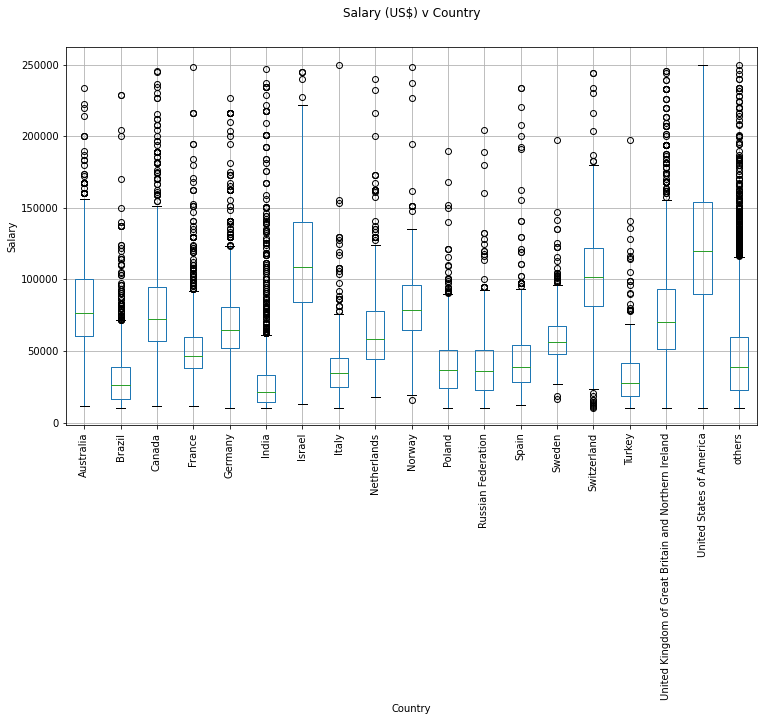

In [18]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df1.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [19]:
df1.YearsCodePro.unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '3', '15', '1', '12', '8', '17', '14', '26', '34', '11', '25',
       '24', '7', '22', '13', '9', '20', '23', '39', '27', '30', '19',
       '35', '33', '37', '43', '40', '29', '38', '31', '42', '28', '46',
       '32', '36', '47', '45', '44', '41', 'More than 50 years', '50',
       '49', '48'], dtype=object)

In [20]:
def clean_experience(years):
    if years == "Less than 1 year":
        return 0.5
    if years == "More than 50 years":
        return 50
    return float(years)

In [21]:
df1['YearsCodePro'] = df1['YearsCodePro'].apply(clean_experience)

In [22]:
df1.YearsCodePro.unique()

array([ 4. ,  5. ,  6. ,  2. , 18. , 21. , 16. , 10. ,  0.5,  3. , 15. ,
        1. , 12. ,  8. , 17. , 14. , 26. , 34. , 11. , 25. , 24. ,  7. ,
       22. , 13. ,  9. , 20. , 23. , 39. , 27. , 30. , 19. , 35. , 33. ,
       37. , 43. , 40. , 29. , 38. , 31. , 42. , 28. , 46. , 32. , 36. ,
       47. , 45. , 44. , 41. , 50. , 49. , 48. ])

In [23]:
df1.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [24]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df1['Education'] = df1['EdLevel'].apply(clean_education)
df1.Education.unique()

array(['Master’s degree', 'Bachelor’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [25]:
df1.drop("EdLevel",axis =1, inplace=True)

In [26]:
df1.head()

,Country,YearsCodePro,Salary,Education
9,Sweden,4.0,51552.0,Master’s degree
11,Spain,5.0,46482.0,Bachelor’s degree
12,Germany,6.0,77290.0,Master’s degree
16,Turkey,2.0,17748.0,Bachelor’s degree
17,Canada,6.0,46135.0,Bachelor’s degree


In [27]:
from sklearn.preprocessing import LabelEncoder
le_ed = LabelEncoder()
df1['Education'] = le_ed.fit_transform(df1['Education'])
df1.Education.unique()

array([2, 0, 1, 3])

In [28]:
le_country = LabelEncoder()
df1["Country"] = le_country.fit_transform(df1['Country'])
df1.Country.unique()

array([13, 12,  4, 15,  2,  3, 14, 16, 11,  6, 18, 17,  1,  7,  8, 10,  0,
        5,  9])

In [29]:
x = df1.drop("Salary",axis=1)
y = df1['Salary']

In [31]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x, y)

y_pred = linear_reg.predict(x)


from sklearn.metrics import mean_squared_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [32]:
print(error)

44527.974196208874


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df1),columns =['Country','YearsCodePro','Salary','Education'] )

df_scaled.head()

,Country,YearsCodePro,Salary,Education
0,0.112962,-0.673874,-0.404771,1.128394
1,-0.045518,-0.543270,-0.508806,-0.915816
2,-1.313361,-0.412666,0.123366,1.128394
3,0.429923,-0.935082,-1.098420,-0.915816
4,-1.630321,-0.412666,-0.515926,-0.915816


In [36]:
x = df_scaled.drop("Salary",axis=1)
y = df_scaled['Salary']

In [37]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x, y)

y_pred = linear_reg.predict(x)


from sklearn.metrics import mean_squared_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))
print(error)

0.9137028353881458


In [44]:
linear_reg.score(x,y)

0.16514712860366298

In [49]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(x,y)


y_pred = random_forest_reg.predict(x)

error = np.sqrt(mean_squared_error(y, y_pred))
print(error, "on scaled data")

0.6231289635660414 on scaled data


In [62]:
random_forest_reg.score(x,y)

-1325362770.6061296

In [50]:
x1= df1.drop("Salary",axis=1)
y1 = df1['Salary']


from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(x1,y1)


y_pred1 = random_forest_reg.predict(x1)

error = np.sqrt(mean_squared_error(y1, y_pred1))
print(error, "on Non scaled data")

30367.337882720585 on Non scaled data


In [58]:
from sklearn.model_selection import RandomizedSearchCV

param_grid ={"n_estimators":[100,200,300,400,500],
            "max_depth":[4,6,8,10,12],
            "min_samples_split":[5,10,15,20,25]}

In [59]:
regressor = RandomForestRegressor(random_state=0)
rs= RandomizedSearchCV(estimator = regressor, param_distributions= param_grid, scoring='neg_mean_squared_error')
rs.fit(x1,y1)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                   param_distributions={'max_depth': [4, 6, 8, 10, 12],
                                        'min_samples_split': [5, 10, 15, 20,
                                                              25],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_squared_error')

In [60]:
rs.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_split=15, n_estimators=200,
                      random_state=0)

In [61]:
regressor_final = RandomForestRegressor(max_depth=10, min_samples_split=15, n_estimators=200,random_state=0)

regressor_final.fit(x1,y1)
y_pred = regressor_final.predict(x1)
error = np.sqrt(mean_squared_error(y1, y_pred))
print("${:,.02f}".format(error))

$31,003.05


In [71]:
X = np.array([["Germany",'Post grad', 5]])
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_ed.transform(X[:,1])
X = X.astype(float)
X

array([[4., 3., 5.]])

In [72]:
regressor_final.predict(X)

C:\anacondafolder\envs\stacksalary\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([57746.98312655])

In [73]:
import pickle

In [74]:
data = {"model": regressor_final,"le_country":le_country, "le_ed":le_ed}
with open("stacksalary_model.pkl","wb")as file:
    pickle.dump(data,file)

In [76]:
with open('stacksalary_model.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_ed"]

In [77]:
regressor_loaded.predict(X)

C:\anacondafolder\envs\stacksalary\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([57746.98312655])